In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#Get training data
dataframe = pd.read_csv("ex1data2.txt", header = None)
dataframe.columns = ['Size', 'Bedrooms', 'Price']
print(dataframe.head(10))

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500


In [21]:
#Convert training data to np arrays
x = dataframe[['Size', 'Bedrooms']].to_numpy()
y = dataframe['Price'].to_numpy()

#Feature Normalization
mean = np.mean(x,axis=0)
std = np.std(x,axis=0)
x = (x - mean)/std

#Adding ones in front for convenience later when calculating bias weight
a = np.ones((x.shape[0],1),dtype=np.int64)
X = np.hstack((a,x))

Y = y.reshape(y.shape[0],1)




In [4]:
#Cost function
def computecost(x,y,theta):
    m = x.shape[0]
    a = 1/(2*m)
    #@ is a numpy operator for matrix multiplication
    #theta is broadcasted to X due to dimension difference
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

#gradient descent function
def gradientdescent(x,y,theta, alpha, EPOCHS):
    m = len(x)
    #h = np.dot(x,theta)
    #error = h-y
    #print(h.shape)
    #print(y.shape)
    #print(error.shape)
    #print(x.shape)
    costlist = []
    for iter in range(EPOCHS):
        h = np.dot(x,theta)
        error = h-y
        theta = theta - (alpha/m)*np.dot(x.transpose(),error)
        costlist.append(computecost(x,y,theta))
    return theta, costlist

65591548106.45744
(47, 1)
(47, 1)
(47, 1)
(47, 3)
2043280050.6267667


Text(0.5, 1.0, 'Cost Analysis')

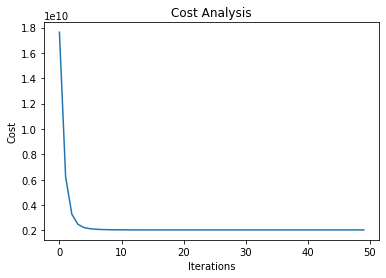

In [5]:
#Initialize Parameters
EPOCHS = 50
alpha = 0.5
theta = np.zeros([3,1])
print(computecost(X,Y,theta))

theta, J  = gradientdescent(X,Y,theta,alpha,EPOCHS)
print(computecost(X,Y,theta))
plt.plot(list(range(EPOCHS)),J,'-')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Analysis")

In [35]:
def predict(x,theta,mean,std):
    X = np.array(x)
    X = (X-mean)/std
    X = X.reshape((1,2))
    a = np.ones((1,1))
    X = np.hstack((a,X))
    prediction = np.dot(X,theta)
    return prediction



print(predict([1650,3],theta,mean,std))

[[293081.51563573]]
